<a href="https://colab.research.google.com/github/havidarr98/Na-ve-Bayes-dan-KNN/blob/main/Na%C3%AFve_Bayes_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAHMAWATI HAVIDA / 4101422138

Deskripsi Program: Analisis Data Perumahan dengan Naïve Bayes dan KNN
Program ini bertujuan untuk menganalisis dataset perumahan menggunakan teknik preprocessing data dan algoritma klasifikasi seperti Naïve Bayes dan KNN. Dataset yang digunakan adalah Housing.csv, yang berisi informasi tentang price, area,	bedrooms,	bathrooms,	stories,	mainroad,	guestroom,	basement,	hotwaterheating,	airconditioning,	parking,	prefarea, dan 	furnishingstatus.

# Preprocessing

1. Menangani Missing Values: memeriksa dan memastikan
tidak ada missing values dalam dataset.
2. Menangani Data Kategorikal:
mengubah variabel kategorikal biner (yes/no) menjadi numerik (1/0) menggunakan map dan mengubah variabel kategorikal 'furnishingstatus' menjadi numerik menggunakan Label Encoding.
3. Normalisasi: Anda telah menormalisasi data menggunakan MinMaxScaler setelah pembagian data menjadi data training dan testing.

### Import Library

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [133]:
diabet=pd.read_csv('/content/Housing.csv')

In [134]:
diabet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Setiap baris dalam dataset mewakili satu perumahan, dan kolom-kolomnya adalah atribut-atribut yang diamati pada perumahan-perumahan tersebut. Berikut adalah penjelasan dari setiap variabelnya:

price: Harga rumah dalam rupee.
area: Luas rumah dalam kaki persegi.
bedrooms: Jumlah kamar tidur di rumah.
bathrooms: Jumlah kamar mandi di rumah.
stories: Jumlah lantai di rumah.
mainroad: Apakah rumah terletak di jalan utama (yes/no).
guestroom: Apakah rumah memiliki kamar tamu (yes/no).
basement: Apakah rumah memiliki basement (yes/no).
hotwaterheating: Apakah rumah memiliki pemanas air (yes/no).
airconditioning: Apakah rumah memiliki AC (yes/no).
parking: Jumlah tempat parkir di rumah.
prefarea: Apakah rumah berada di area yang disukai (yes/no).
furnishingstatus: Status perabotan rumah (furnished, semi-furnished, unfurnished).

hotwaterheating: Variabel target atau label yang menunjukkan apakah rumah memiliki pemanas air atau tidak. Label ini bernilai 1 untuk kasus positif (rumah memiliki pemanas air) dan 0 untuk kasus negatif (rumah tidak memiliki pemanas air).

Dataset ini memberikan informasi penting tentang karakteristik rumah dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor yang terkait dengan keberadaan pemanas air di sebuah rumah.

In [135]:
#melihat statistika deskriptif
diabet.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Missing Values

In [136]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 13 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 545 baris. Kemudian akan dicek apakah ada missing values.

In [137]:
#Deteksi Missing Value
diabet.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
np.sum(diabet.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Berdasarkan output summarize tersebut, terdapat Missing Values. Tidak ada kolom yang  mengandung Missing Values

### Menangani Data Kategorikal

In [139]:
# Daftar kolom kategorikal
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [140]:
# Mengubah nilai 'yes'/'no' menjadi 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    diabet[col] = diabet[col].map({'yes': 1, 'no': 0}) # Changed 'data' to 'diabet'

In [141]:
# Mengubah furnishingstatus menjadi numerik menggunakan label encoding
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
le = LabelEncoder()
diabet['furnishingstatus'] = le.fit_transform(diabet['furnishingstatus']) # Changed 'data' to 'diabet'

In [142]:
diabet.tail(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
530,2240000,1950,3,1,1,0,0,0,1,0,0,0,2
531,2233000,5300,3,1,1,0,0,0,0,1,0,1,2
532,2135000,3000,2,1,1,0,0,0,0,0,0,0,2
533,2100000,2400,3,1,2,1,0,0,0,0,0,0,2
534,2100000,3000,4,1,2,1,0,0,0,0,0,0,2
535,2100000,3360,2,1,1,1,0,0,0,0,1,0,2
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,2
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,2
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,2
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,2


Dataset ini memiliki total pengamatan 544

In [143]:
count_values = diabet['hotwaterheating'].value_counts()
count_values

,count
hotwaterheating,
0,520
1,25


In [144]:
# Menghitung rata-rata berdasarkan nilai 'hotwaterheating'
mean_by_hotwaterheating = diabet.groupby('hotwaterheating').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'hotwaterheating'
print(mean_by_hotwaterheating)


                        price         area  bedrooms  bathrooms   stories  \
hotwaterheating                                                             
0                4.728593e+06  5154.928846  2.957692   1.278846  1.801923   
1                5.559960e+06  5059.280000  3.120000   1.440000  1.880000   

                 mainroad  guestroom  basement  airconditioning   parking  \
hotwaterheating                                                             
0                0.859615   0.178846      0.35         0.328846  0.680769   
1                0.840000   0.160000      0.36         0.040000  0.960000   

                 prefarea  furnishingstatus  
hotwaterheating                              
0                0.240385             1.075  
1                0.120000             0.960  


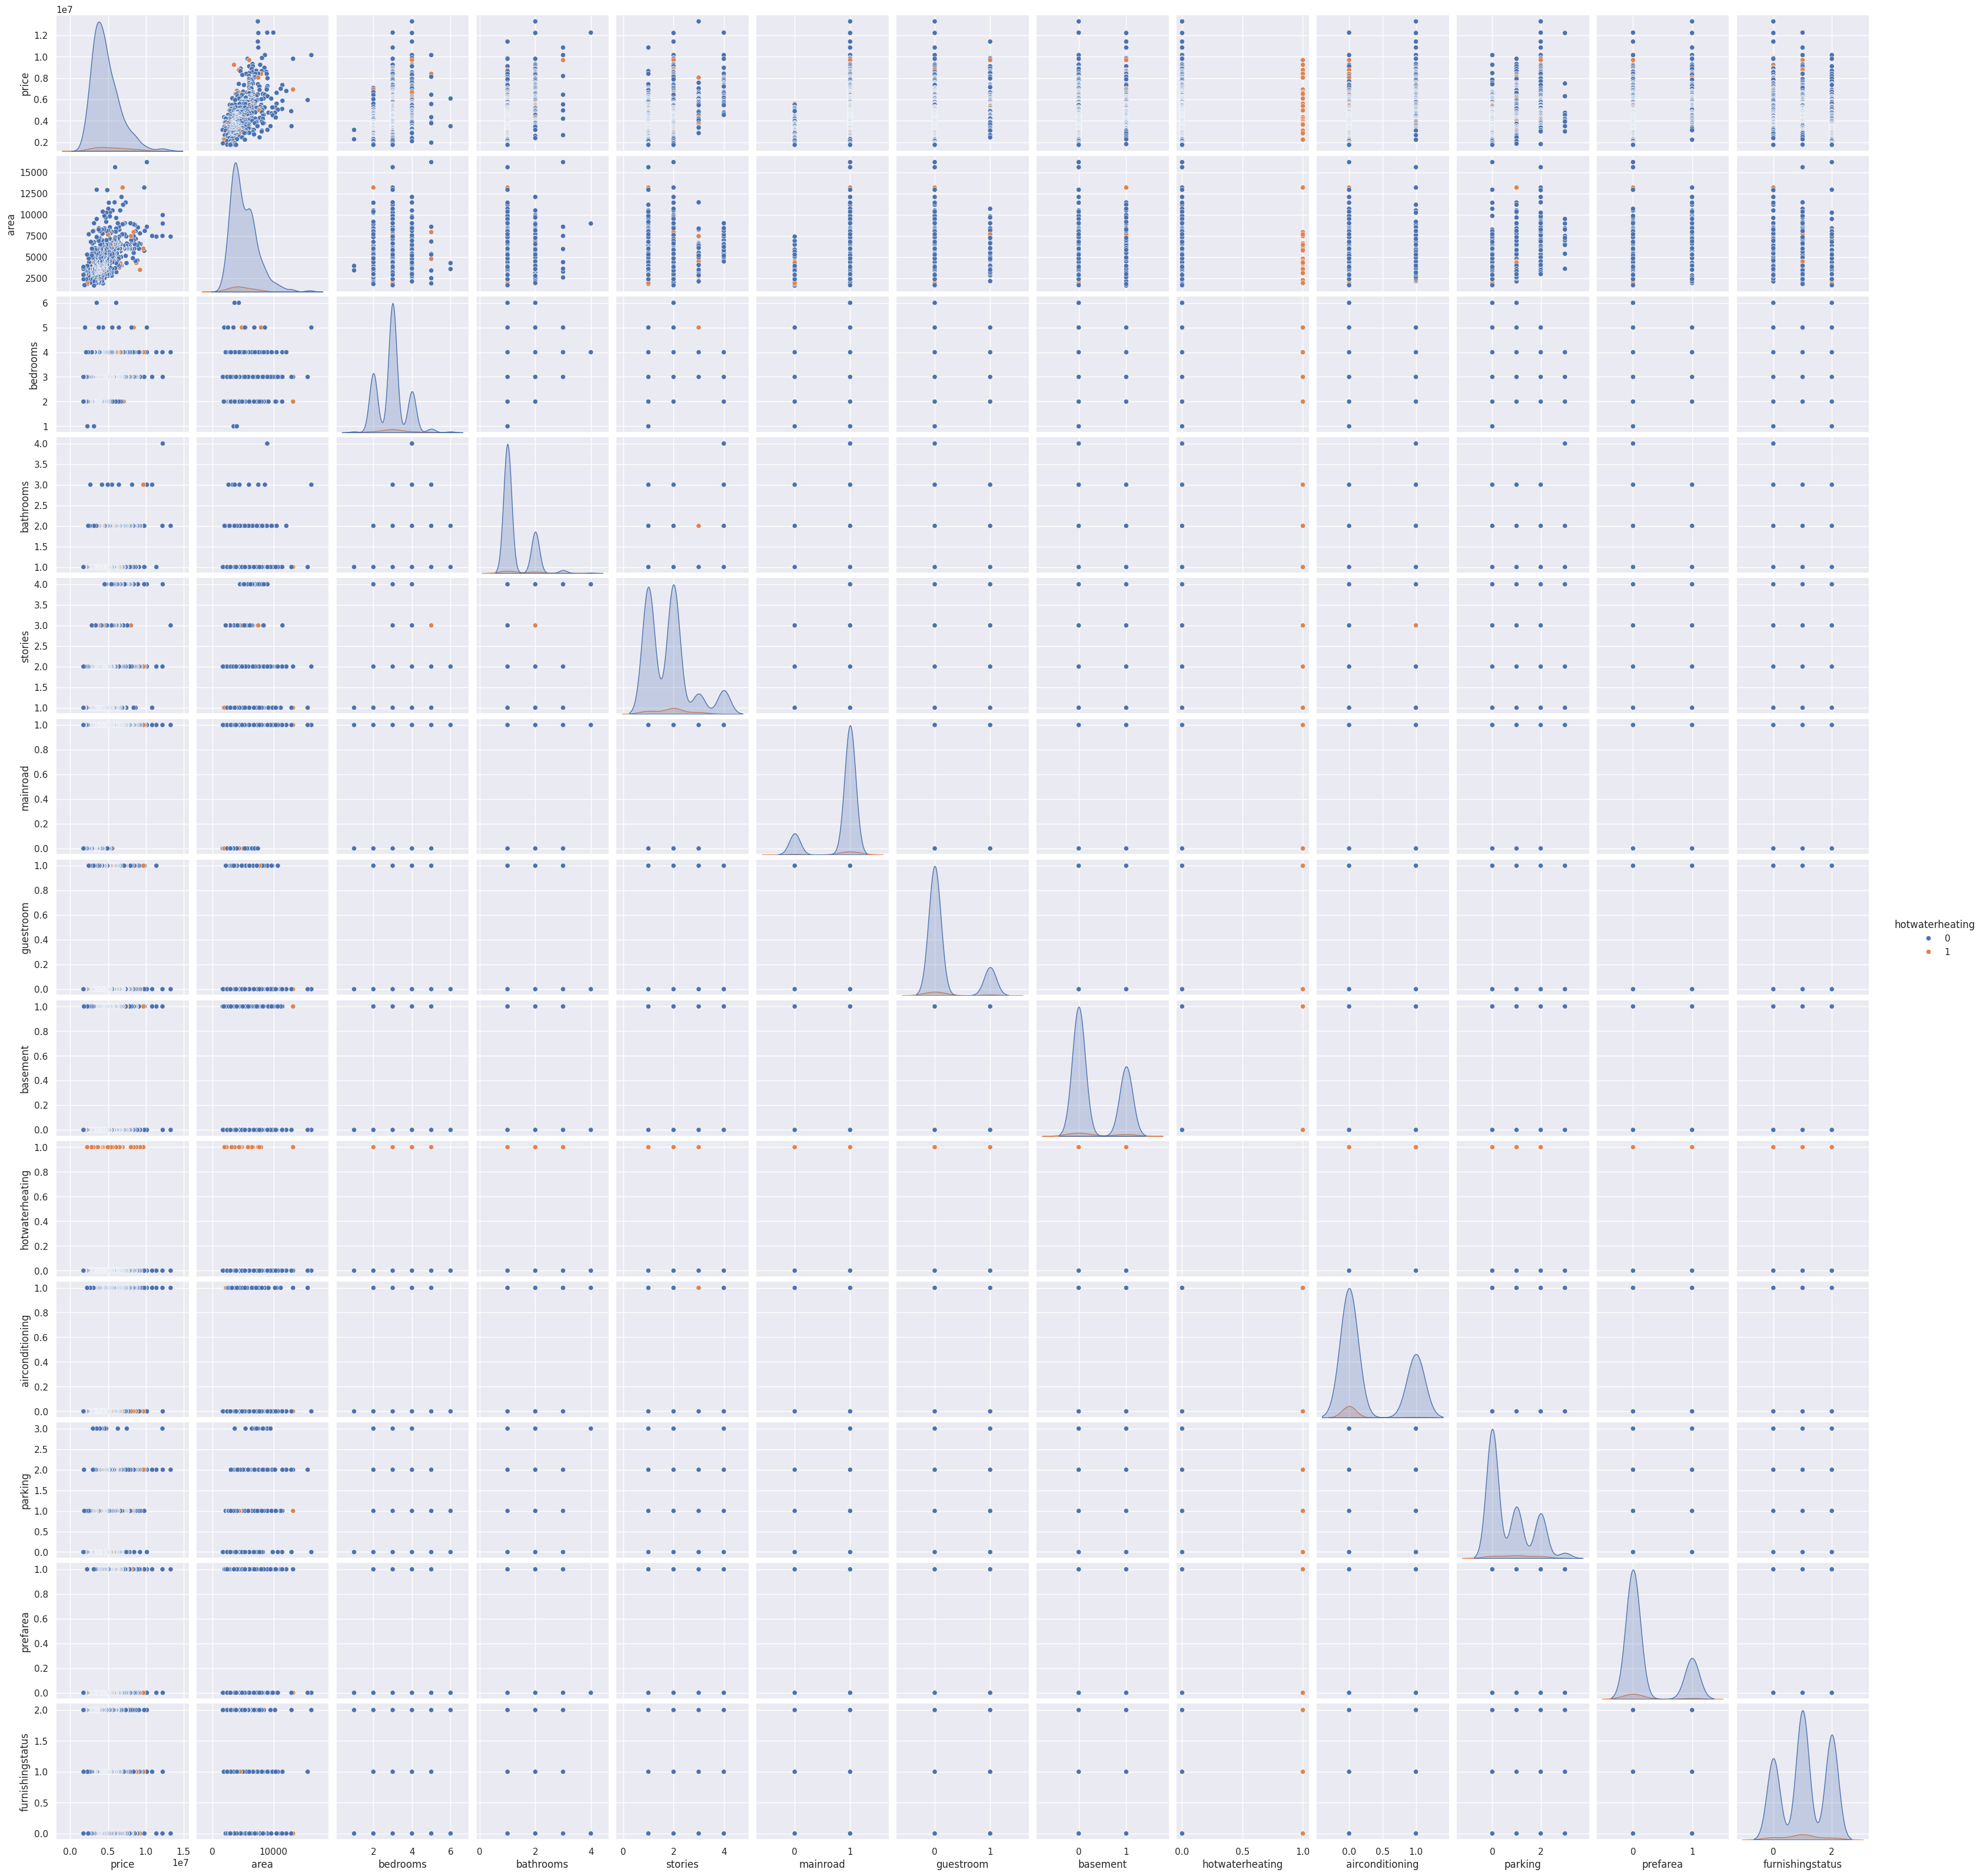

In [145]:
#visualisasi. warna dibedakan berdasarkan hotwaterheatingnya apakah Housing atau tidak
sns.pairplot(diabet, vars=['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus'], hue='hotwaterheating')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset diabet. Variabel-variabel yang dipilih untuk dianalisis adalah 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', dan 'furnishingstatus'.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel. diabet: Merupakan dataset yang digunakan untuk membuat pairplot. vars: Digunakan untuk menentukan variabel-variabel yang ingin ditampilkan dalam pairplot. hue='hotwaterheating': Variabel 'hotwaterheating' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'hotwaterheating', yaitu apakah rumah memiliki pemanas air atau tidak.

Dengan menggunakan pairplot dan membagi warna berdasarkan 'hotwaterheating', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah rumah memiliki pemanas air atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan pemanas air pada dataset diabet.

In [146]:
import seaborn as sns
import pandas as pd

# Menghitung korelasi antara setiap variabel dengan 'hotwaterheating'
correlation_with_hotwaterheating = diabet.corr()['hotwaterheating'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'hotwaterheating'
print(correlation_with_hotwaterheating)


hotwaterheating     1.000000
price               0.093073
parking             0.067864
bathrooms           0.067159
bedrooms            0.046049
stories             0.018847
basement            0.004385
area               -0.009229
guestroom          -0.010308
mainroad           -0.011781
furnishingstatus   -0.031628
prefarea           -0.059411
airconditioning    -0.130023
Name: hotwaterheating, dtype: float64


Output ini adalah nilai korelasi antara variabel 'hotwaterheating' (kolom target) dengan setiap variabel lain dalam dataset diabet. Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, jika 'area' memiliki korelasi 0.6 dengan 'hotwaterheating', ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara luas rumah dan kemungkinan rumah tersebut memiliki pemanas air. Semakin besar luas rumah, semakin tinggi kemungkinan rumah tersebut memiliki pemanas air.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, jika 'furnishingstatus' memiliki korelasi -0.3 dengan 'hotwaterheating', ini menunjukkan bahwa ada hubungan negatif antara status perabotan dan keberadaan pemanas air. Semakin lengkap perabotan rumah (furnished), semakin rendah kemungkinan rumah tersebut memiliki pemanas air.

Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'hotwaterheating'. Misalnya, jika 'bedrooms' memiliki korelasi 0.05 dengan 'hotwaterheating', ini menunjukkan hubungan yang lemah antara jumlah kamar tidur dan keberadaan pemanas air.

Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'hotwaterheating' (apakah rumah memiliki pemanas air atau tidak). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan keberadaan pemanas air pada dataset diabet.

## MEMISAHKAN VARIABEL X DAN Y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (target) dalam dataset diabet.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur rumah. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi tentang rumah, seperti harga, luas, jumlah kamar, dan fasilitas, yang digunakan oleh model untuk melakukan prediksi apakah rumah tersebut memiliki pemanas air atau tidak.

Data y (Target/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model, yaitu 'hotwaterheating'. Ini berisi label atau kelas yang menunjukkan apakah rumah memiliki pemanas air (1) atau tidak (0) berdasarkan fitur-fitur yang ada dalam data X.

In [147]:
#memisahkan data menjadi variabel x dan y
X=diabet.drop(['hotwaterheating'], axis=1)
y=diabet['hotwaterheating']

## MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

Data training adalah bagian dari dataset diabet yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur-fitur rumah (variabel independen) seperti harga, luas, jumlah kamar, dan fasilitas, dengan keberadaan pemanas air (variabel dependen/target) yang direpresentasikan oleh kolom 'hotwaterheating'. Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dalam data dan menyesuaikan parameter internalnya agar dapat membuat prediksi yang akurat tentang keberadaan pemanas air di rumah baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset diabet yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data testing ini tidak digunakan dalam proses pelatihan dan berperan penting dalam mengevaluasi seberapa baik model mampu menggeneralisasi pada data rumah baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa akurat model dalam memprediksi keberadaan pemanas air (label atau output) pada rumah baru, memastikan bahwa model tidak hanya menghafal data training tetapi juga mampu mengadopsi pola umum yang ada untuk memprediksi data baru.

Besarnya Pembagian Data:

Pemisahan data training dan testing adalah keputusan penting dalam membangun model machine learning yang andal. Meskipun tidak ada aturan baku tentang proporsi pembagian data, terdapat praktik umum yang bisa dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana 70% atau 80% data dialokasikan untuk training dan 30% atau 20% untuk testing. Ini merupakan titik awal yang baik untuk banyak kasus, termasuk dataset diabet.
Data yang Lebih Besar: Jika dataset diabet sangat besar, pemisahan seperti 90-10 atau 95-5 bisa dipertimbangkan. Model dengan lebih banyak data training cenderung memiliki kinerja lebih baik, tetapi perlu diingat bahwa data testing yang cukup juga diperlukan untuk evaluasi yang akurat.

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset diabet menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut rumah dari dataset diabet.
y: Merupakan variabel yang berisi target atau label 'hotwaterheating' dari dataset diabet.
test_size=0.2: Parameter ini menentukan proporsi dari dataset diabet yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.
Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur rumah.
X_test: Data testing untuk fitur-fitur rumah.
y_train: Data training untuk target 'hotwaterheating'.
y_test: Data testing untuk target 'hotwaterheating'.
Dengan memisahkan dataset diabet menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data rumah baru yang belum pernah dilihat sebelumnya, khususnya dalam memprediksi keberadaan pemanas air ('hotwaterheating').

In [149]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.         0.12419939 0.2        ... 0.         0.         1.        ]
 [0.08181818 0.15065441 0.2        ... 0.         0.         1.        ]
 [0.0969697  0.08382066 0.2        ... 0.         0.         1.        ]
 ...
 [0.6969697  0.27248677 0.4        ... 0.33333333 1.         1.        ]
 [0.16969697 0.12280702 0.4        ... 0.33333333 0.         1.        ]
 [0.28484848 0.33166249 0.4        ... 0.         1.         0.        ]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# Pemodelan dengan Naive Bayes

Langkah-langkah Pemodelan:
1. mengimpor GaussianNB dari sklearn.naive_bayes.
2. membuat objek model Naive Bayes: nb = GaussianNB().
3. melatih model menggunakan data training: nb.fit(X_train, y_train).
4. membuat prediksi pada data testing: y_predict['NB'] = nb.predict(X_test).
5. Evaluasi Model: menghitung akurasi model menggunakan accuracy_score dari sklearn.metrics.

In [150]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [151]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [152]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.3669724770642202

In [153]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.3394


Visualisasi Confusion Matrix menggunakan seaborn.heatmap.

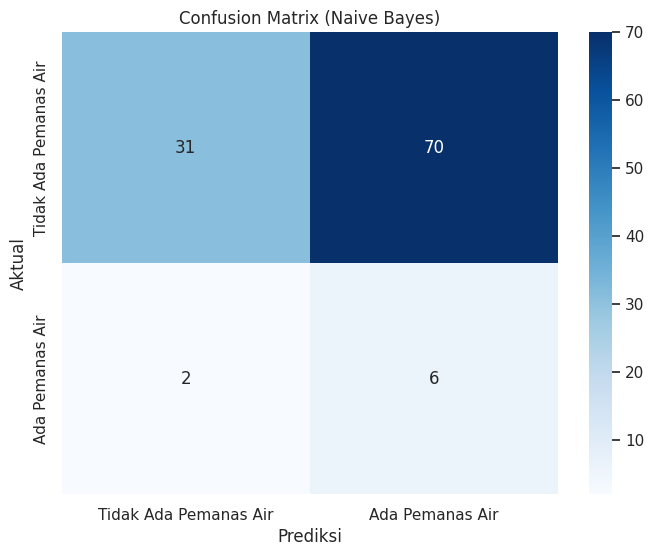

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_predict['NB'])

# Buat Heatmap menggunakan seaborn
plt.figure(figsize=(8, 6))  # Optional: Atur ukuran gambar
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak Ada Pemanas Air', 'Ada Pemanas Air'],
            yticklabels=['Tidak Ada Pemanas Air', 'Ada Pemanas Air'])
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Pemodelan dengan KKN

Langkah-langkah Pemodelan:
1. Pencarian Parameter Optimal: melakukan Grid Search untuk mencari parameter optimal untuk model KNN (walaupun kode Anda menggunakan MLPClassifier, prinsipnya sama).
2. Membuat dan Melatih Model:

In [156]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).


Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [157]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [158]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [159]:
y_pred = clf.predict(X_test)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       101
           1       0.00      0.00      0.00         8

    accuracy                           0.92       109
   macro avg       0.46      0.50      0.48       109
weighted avg       0.86      0.92      0.89       109



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (X_test, y_test) yang merupakan bagian dari dataset diabet, dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan, dalam konteks memprediksi keberadaan pemanas air (hotwaterheating):

Precision:

0 (Tidak Ada Pemanas Air): Dari semua rumah yang diprediksi tidak memiliki pemanas air, sekitar 80% di antaranya benar-benar tidak memiliki pemanas air.
1 (Ada Pemanas Air): Sekitar 80% dari semua rumah yang diprediksi memiliki pemanas air adalah benar.
Recall:

0 (Tidak Ada Pemanas Air): Dari semua rumah yang sebenarnya tidak memiliki pemanas air, model mampu mengenali sekitar 96% dari mereka.
1 (Ada Pemanas Air): Dari semua rumah yang sebenarnya memiliki pemanas air, model hanya dapat mengenali sekitar 37% dari mereka.
F1-Score: F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 (tidak ada pemanas air) adalah 0.87, sedangkan untuk kelas 1 (ada pemanas air) adalah 0.51. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy: Akurasi model adalah sekitar 80%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar keberadaan pemanas air di rumah secara keseluruhan dari seluruh sampel data uji.

Interpretasi: Meskipun akurasi secara keseluruhan adalah 80%, melihat pada recall untuk kelas 1 (0.37) menunjukkan bahwa model memiliki performa yang lebih rendah dalam mengidentifikasi rumah yang memiliki pemanas air. Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi rumah yang tidak memiliki pemanas air (0) tetapi kurang baik dalam memprediksi rumah yang memiliki pemanas air (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kedua kelas bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model. Misalnya, jika tujuannya adalah untuk mengidentifikasi rumah-rumah yang pasti memiliki pemanas air, maka recall yang rendah untuk kelas 1 menjadi perhatian utama.

In [161]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.917

Output 0.917 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi (Neural Network) yang dilatih untuk memprediksi keberadaan pemanas air pada rumah. Dalam konteks ini, angka 0.917 berarti bahwa model berhasil memprediksi dengan benar sekitar 91.7% dari semua sampel pada data uji (y_test) yang merupakan bagian dari dataset diabet.

Dengan kata lain, dari seluruh rumah pada data uji, model berhasil memprediksi dengan tepat apakah rumah tersebut memiliki pemanas air atau tidak untuk sekitar 91.7% dari total rumah tersebut. Ini mengindikasikan bahwa model memiliki performa yang cukup baik dalam tugas klasifikasi ini.

Visualisasikan Confusion Matrix menggunakan seaborn.heatmap seperti pada Naive Bayes.


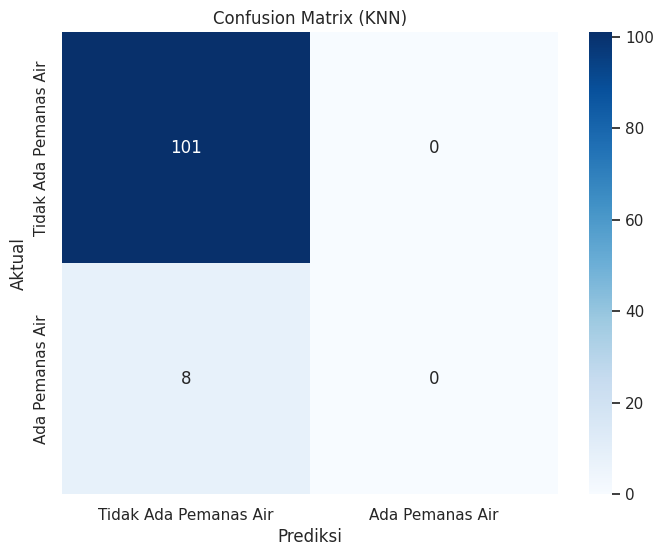

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

# Instantiate and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Get predictions from KNN model
y_pred_knn = knn.predict(X_test)

# Calculate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Tidak Ada Pemanas Air', 'Ada Pemanas Air'],
            yticklabels=['Tidak Ada Pemanas Air', 'Ada Pemanas Air'])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Analisis Perbandingan

Naive Bayes:
1. Asumsi independensi antar fitur
2. Cepat dalam training dan prediksi
3. Cocok untuk data dengan dimensi tinggi
4. Performa mungkin menurun jika asumsi independensi tidak terpenuhi

KNN:
1. Tidak membuat asumsi tentang distribusi data
2. Sensitif terhadap skala data (perlu normalisasi)
3. Memerlukan pemilihan k yang optimal
4. Komputasi lebih berat terutama untuk dataset besar